In [1]:
import numpy as np
import matplotlib.pyplot as plt

from hopfiled import HopfieldNet, preprocesar
from PIL import Image

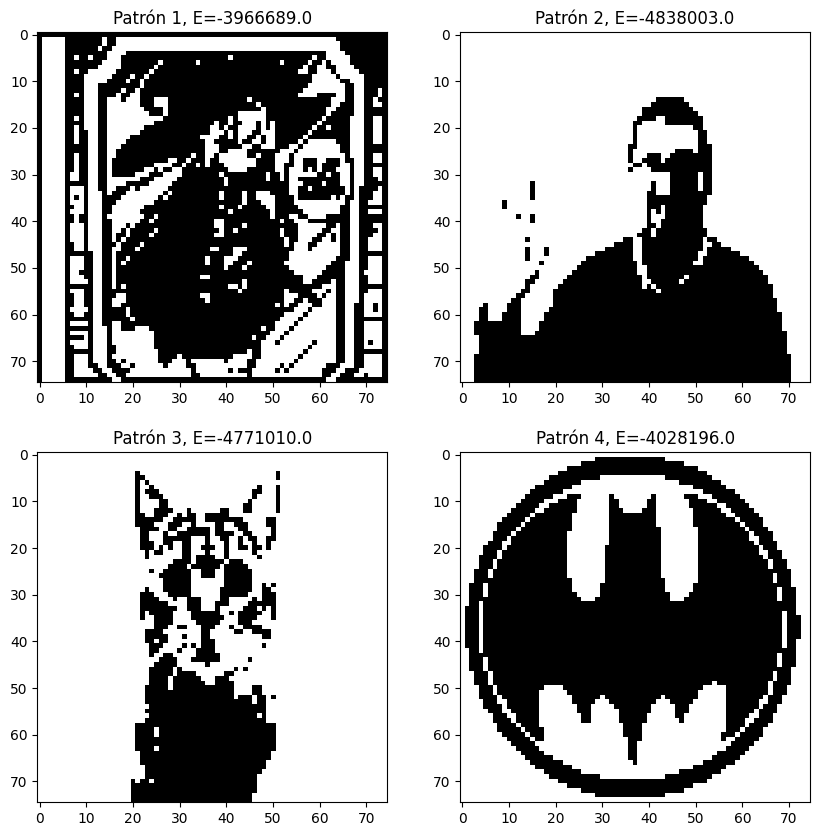

In [26]:
# Vamos a entrenar la red con 4 patrones
pattern1 = preprocesar('inputs/azuza.png', umbral=225)
pattern2 = preprocesar('inputs/samir.jpg')
pattern3 = preprocesar('inputs/gato.jpg', umbral=175)
pattern4 = preprocesar('inputs/batman.png', umbral=225)
pattern5 = preprocesar('inputs/superman.jpg', umbral=225)
# Creamos un array con los patrones que queremos que aprenda la red
patterns = [pattern1, pattern2, pattern3, pattern4]

# Creamos la red de Hopfield
net = HopfieldNet(pattern1.shape)
# Entrenamos la red con los patrones
net.train(patterns)

# Mostamos las imágenes almacenadas
plt.figure(figsize=(10, 10))
plt.subplot(2, 2, 1)
plt.imshow(pattern1, cmap='gray')
plt.title(f'Patrón 1, E={net.energy(pattern1)}')
plt.subplot(2, 2, 2)
plt.imshow(pattern2, cmap='gray')
plt.title(f'Patrón 2, E={net.energy(pattern2)}')
plt.subplot(2, 2, 3)
plt.imshow(pattern3, cmap='gray')
plt.title(f'Patrón 3, E={net.energy(pattern3)}')
plt.subplot(2, 2, 4)
plt.imshow(pattern4, cmap='gray')
plt.title(f'Patrón 4, E={net.energy(pattern4)}')
plt.show()


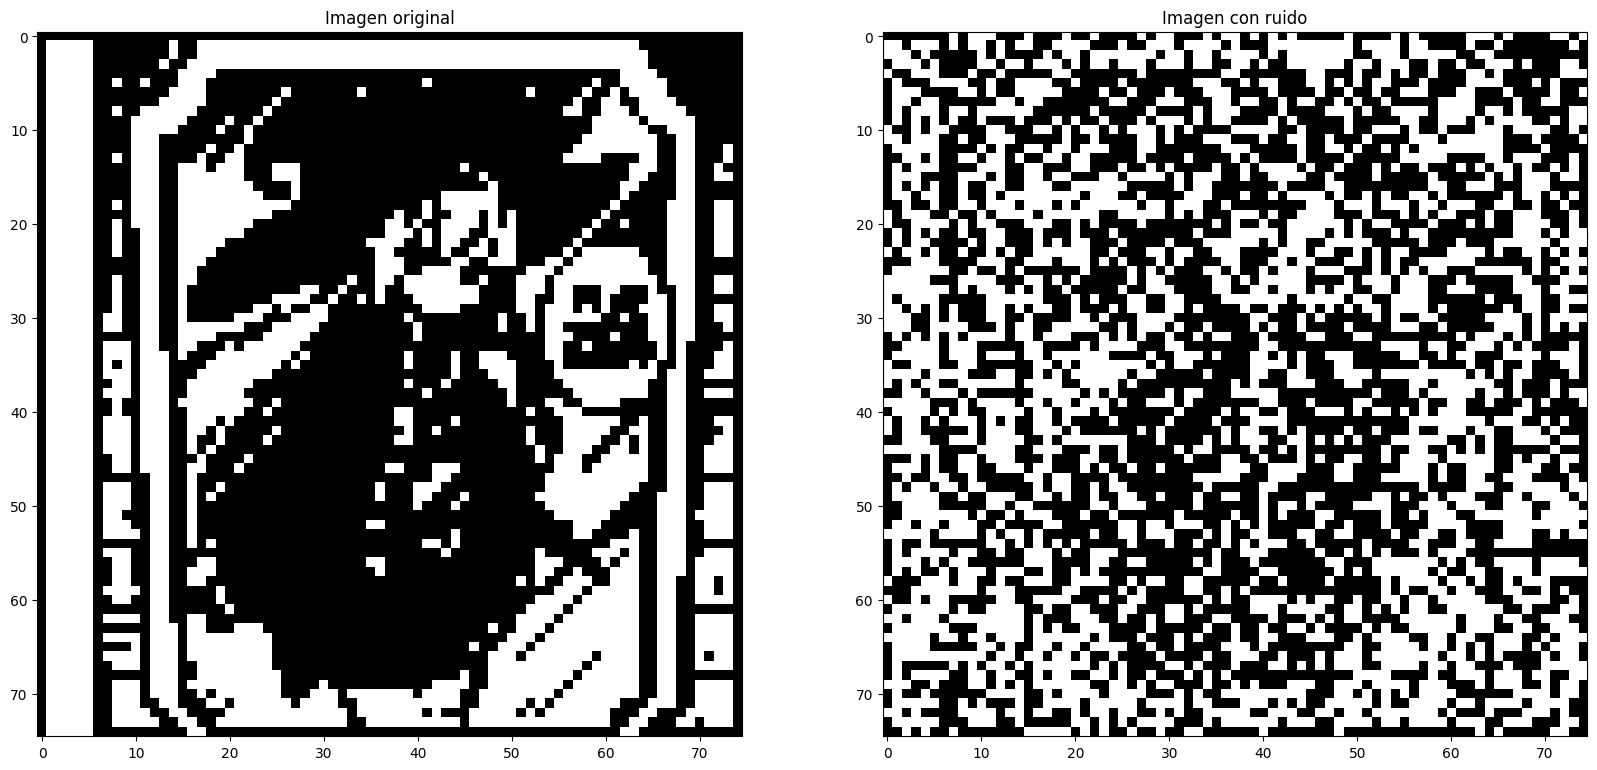

In [3]:
# Generamos un ruido en la imagen
def add_noise(imagen, porcentaje=0.1):
    '''
    Esta función genera un ruido en la imagen, cambiando el valor de los pixeles
    De forma aleatoria, invirtiendo su valor.
    '''
    imagen_ruido = imagen.copy()
    pixeles = imagen.size
    n_ruido = int(pixeles * porcentaje)
    for i in range(n_ruido):
        x = np.random.randint(0, imagen.shape[0])
        y = np.random.randint(0, imagen.shape[1])
        imagen_ruido[x, y] = -imagen_ruido[x, y]
    
    return imagen_ruido

'''
# Con esto podemos generar un ruido en la imagen cortando partes de la imagen
pattern1_noisy = pattern1.copy()
pattern1_noisy[30:75, 10:60] = 1
pattern1_noisy[20:40, 10:40] = 1
pattern1_noisy[30:60, 40:60] = 1
'''
pattern1_noisy = add_noise(pattern1, porcentaje=0.5)

# Mostramos la imagen con ruido
plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
plt.imshow(pattern1, cmap='gray')
plt.title('Imagen original')
plt.subplot(1, 2, 2)
plt.imshow(pattern1_noisy, cmap='gray')
plt.title('Imagen con ruido')
plt.show()

In [20]:
from IPython.display import clear_output
# Corregimos la imagen con ruido usando la red de Hopfield
def corregir_patron(pattern, net, steps=1000, n_iter=30):
    state = pattern.copy()
    E = [-net.energy(state)]
    for i in range(n_iter):
        state = net.update(state, steps = steps).reshape(pattern.shape)
        E.append(-net.energy(state))
        plt.figure(figsize=(20, 10))
        plt.subplot(1, 2, 1)
        plt.imshow(state, cmap='gray')
        plt.title(f'Imagen corregida \n E={np.round(-E[-1], 4)}')
        plt.subplot(1, 2, 2)
        plt.plot(E)
        plt.xlabel('Iteraciones')
        plt.ylabel('-Energia')
        plt.xscale('log')
        plt.yscale('log')  
        plt.title('Energia')
        plt.show()
        clear_output(wait=True)
    return state, E


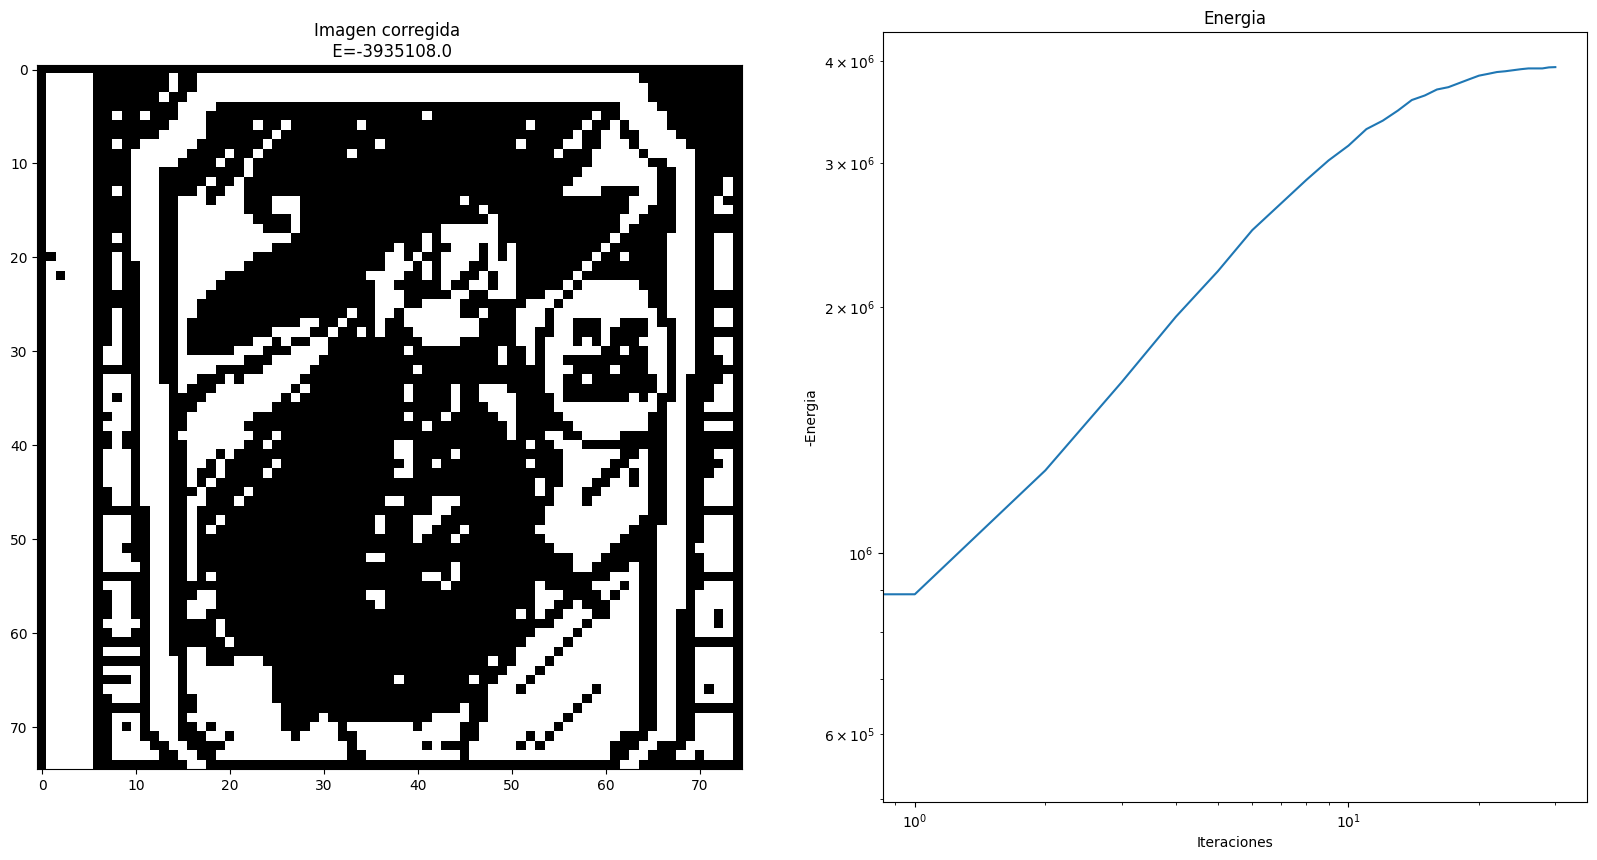

In [21]:
# Corregimos la imagen con ruido usando la red de Hopfield


state, E = corregir_patron(pattern1_noisy, net, steps=1000, n_iter=30)



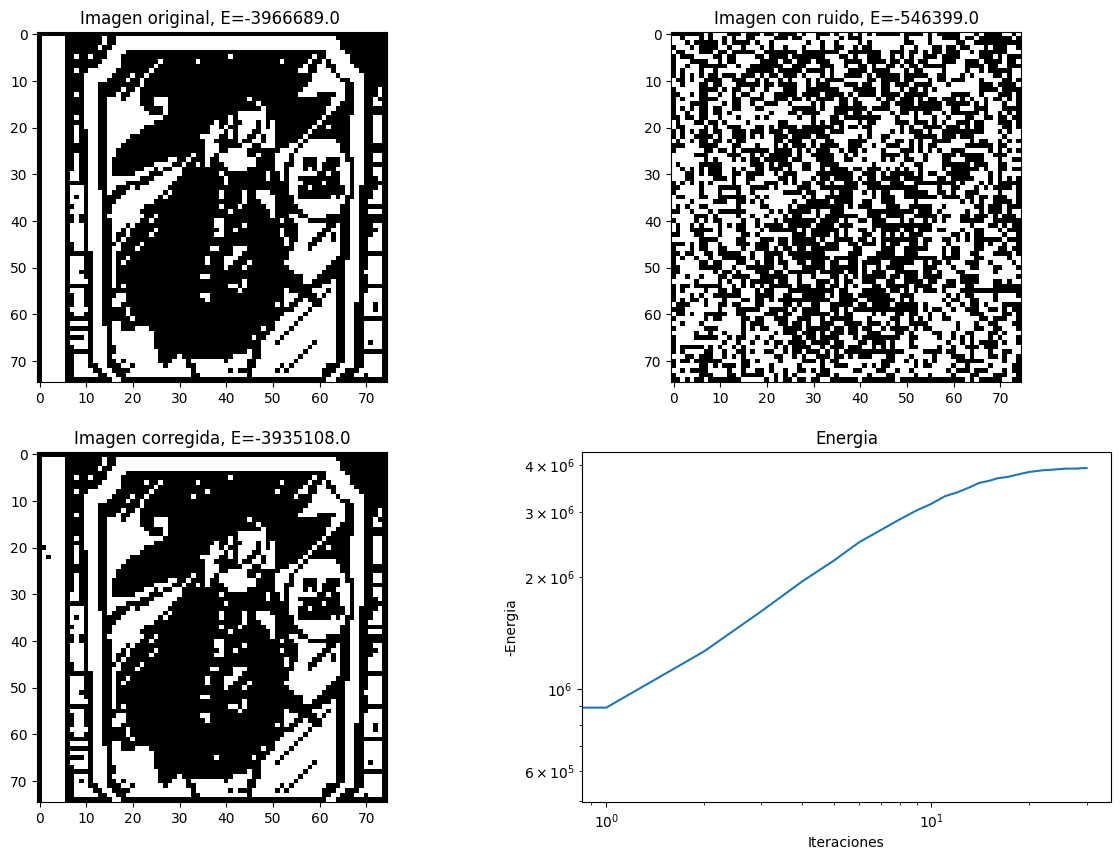

In [25]:
# hacemos gráfica con el patrón original, con ruido y el patrón corregido y la energía
plt.figure(figsize=(15, 10))
plt.subplot(2, 2, 1)
plt.imshow(pattern1, cmap='gray')
plt.title(f'Imagen original, E={net.energy(pattern1)} ')
plt.subplot(2, 2, 2)
plt.imshow(pattern1_noisy, cmap='gray')
plt.title(f'Imagen con ruido, E={np.round(net.energy(pattern1_noisy), 4)}')
plt.subplot(2, 2, 3)
plt.imshow(state, cmap='gray')
plt.title(f'Imagen corregida, E={np.round(-E[-1], 4)}')
plt.subplot(2, 2, 4)
plt.plot(E)
plt.xlabel('Iteraciones')
plt.ylabel('-Energia')
plt.xscale('log')
plt.yscale('log')
plt.title('Energia')
plt.show()

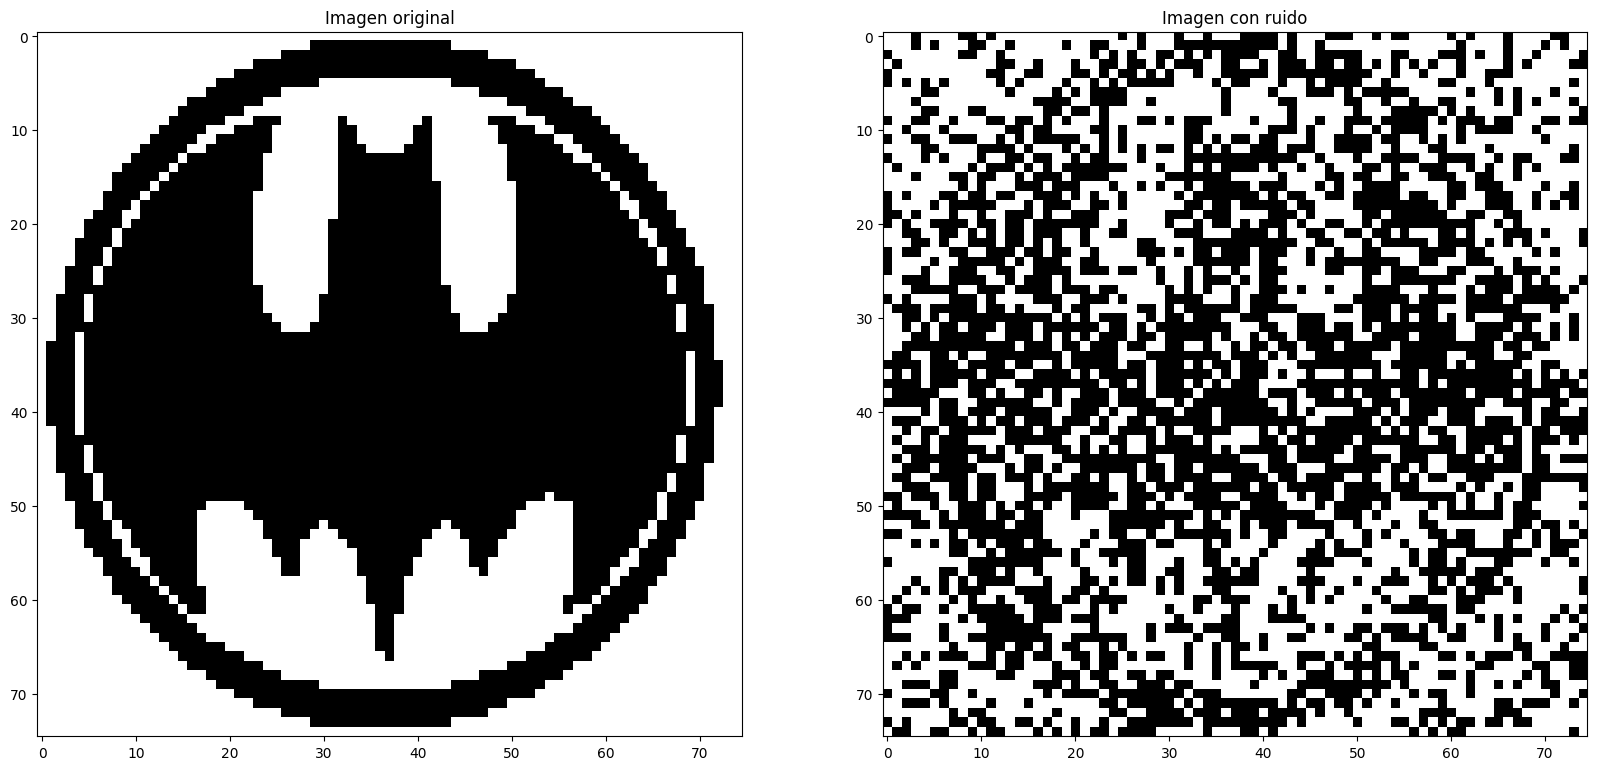

In [7]:
# Repetimos el proceso con otro patrón
pattern2_noisy = add_noise(pattern4, porcentaje=0.5)

# Mostramos la imagen con ruido
plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
plt.imshow(pattern4, cmap='gray')
plt.title('Imagen original')
plt.subplot(1, 2, 2)
plt.imshow(pattern2_noisy, cmap='gray')
plt.title('Imagen con ruido')
plt.show()

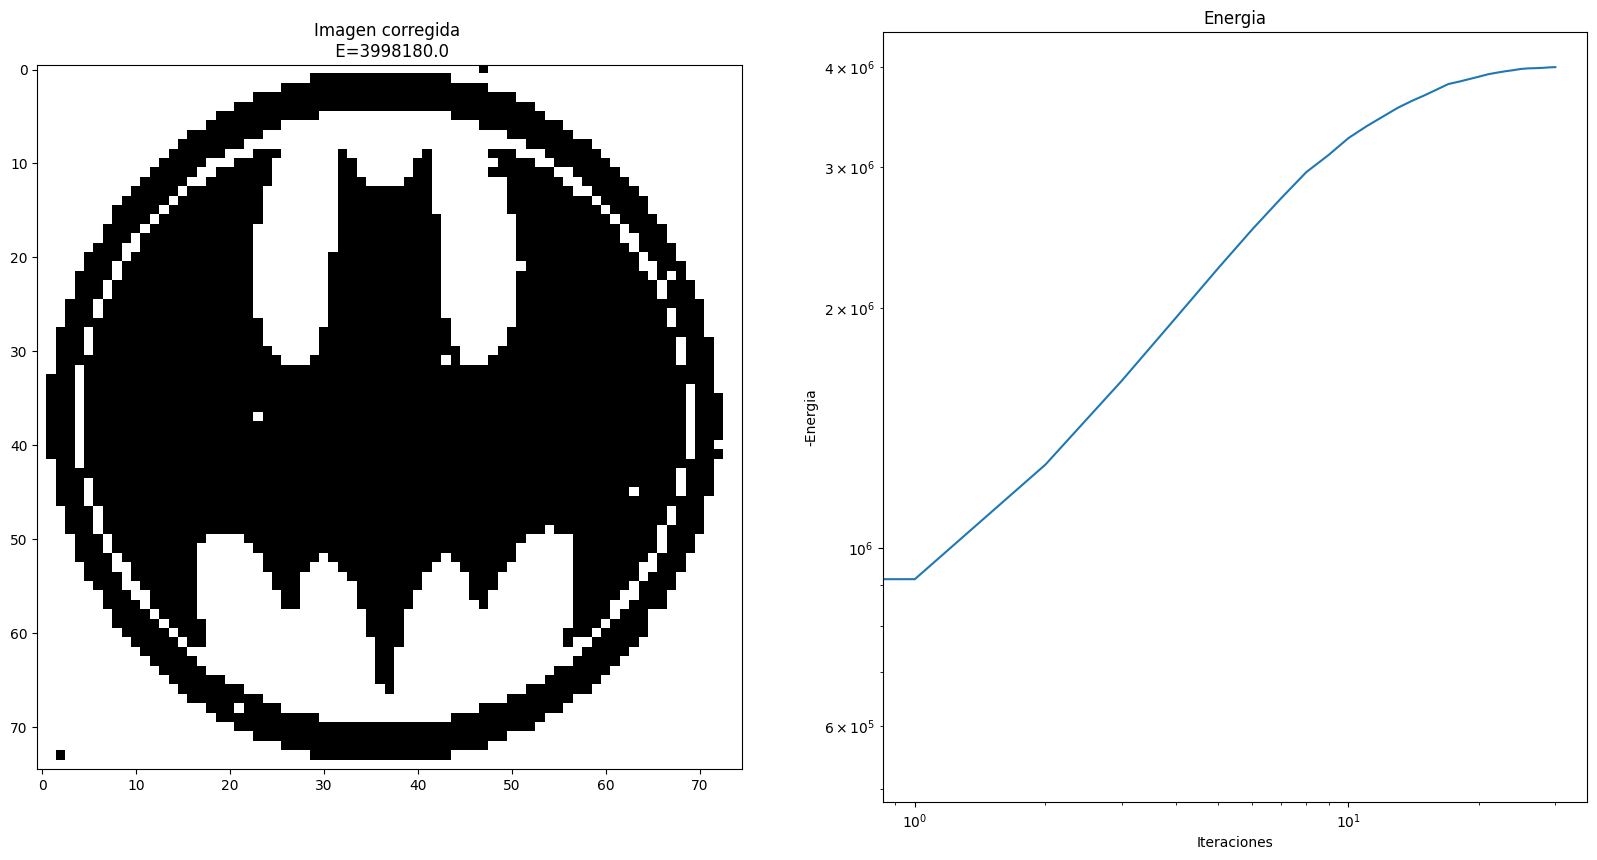

In [8]:
# Corregimos la imagen con ruido usando la red de Hopfield
state, E =  corregir_patron(pattern2_noisy, net, steps=1000, n_iter=30)

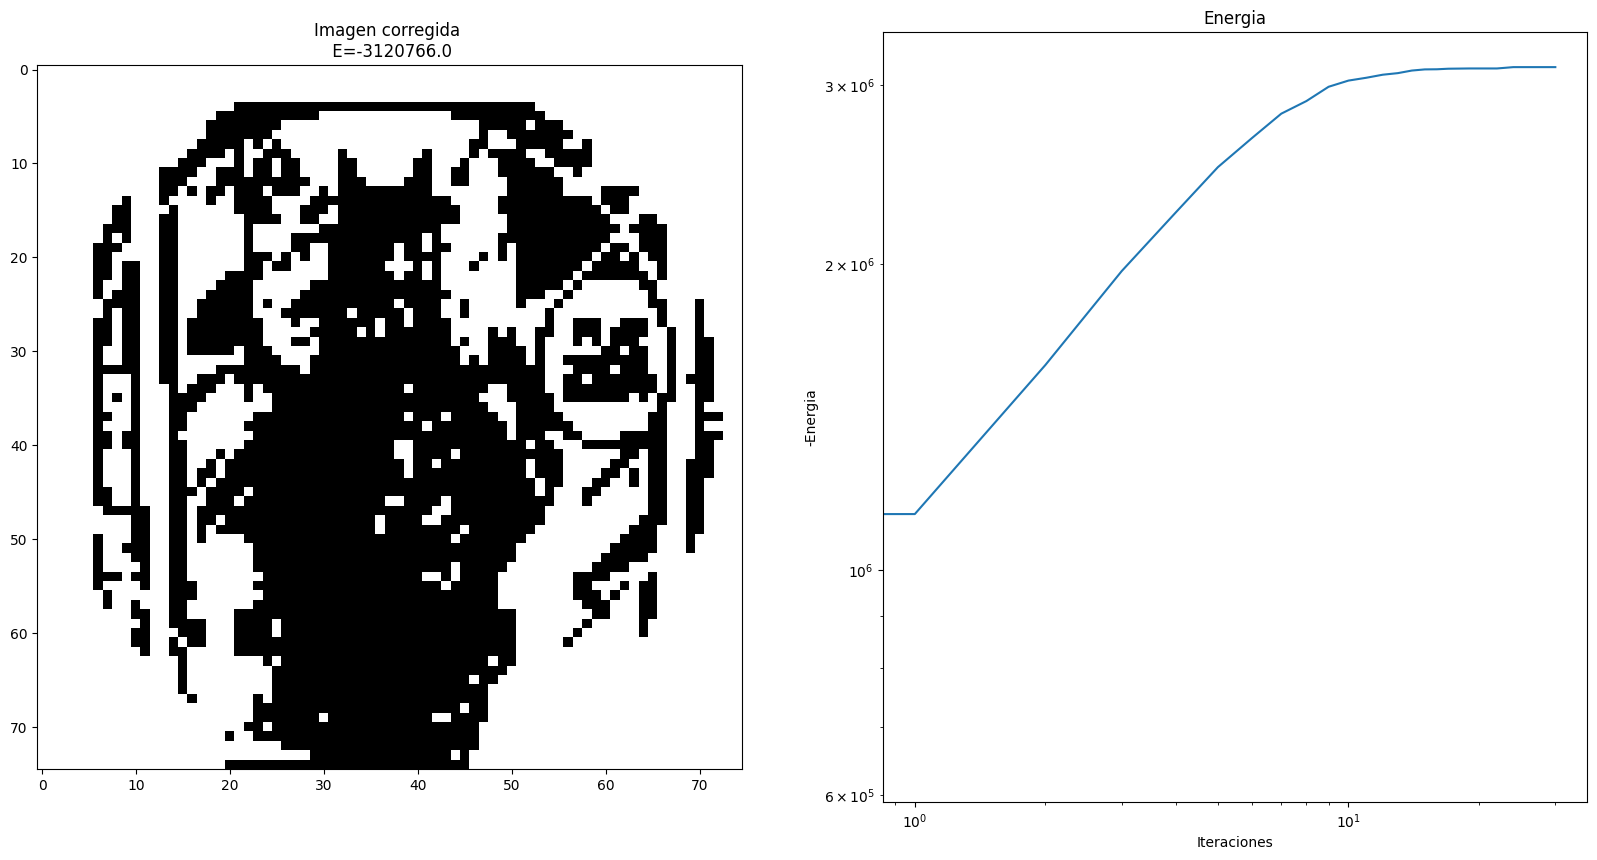

In [35]:
# Ahora vamos a ver que pasa si le damos una imagen que no ha visto antes.
p3 = add_noise(pattern5, porcentaje=0)
# Vemos la evolución de la red con el patrón 5 igual que antes
state, E =  corregir_patron(p3, net, steps=2000, n_iter=30)

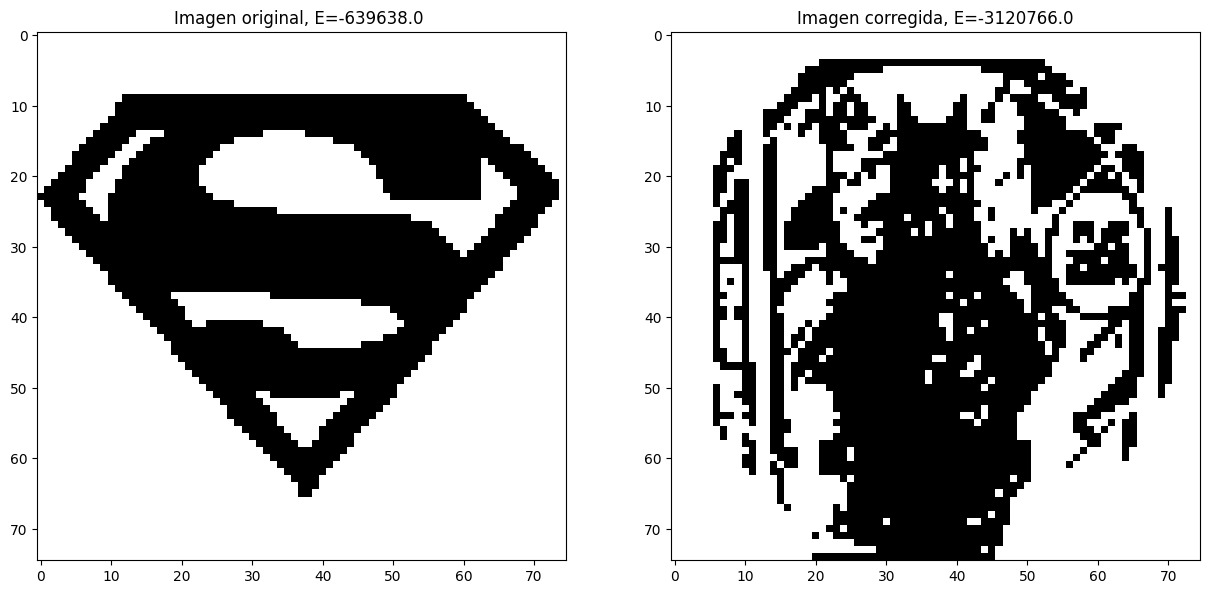

In [36]:
plt.figure(figsize=(15, 10))
plt.subplot(1, 2, 1)
plt.imshow(pattern5, cmap='gray')
plt.title(f'Imagen original, E={net.energy(pattern5)} ')
plt.subplot(1, 2, 2)
plt.imshow(state, cmap='gray')
plt.title(f'Imagen corregida, E={np.round(-E[-1], 4)}')
plt.show()


Como podemos ver en la imagen, la red converge a un atractor espureo que es combinación lineal de los distintos patrones almacenados en este caso.

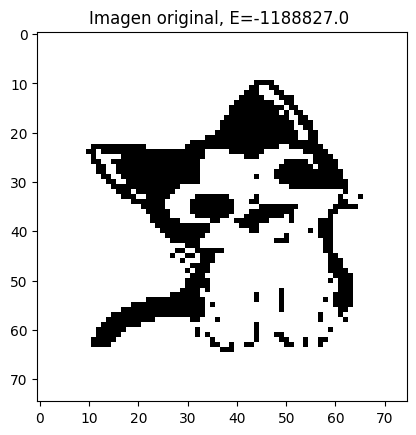

In [47]:
# Vamos a probar a darle una imagen que no ha visto antes pero se parece a una de las que ha visto.
pattern6 = preprocesar('patterns/animecat.jpg', umbral=200)
plt.imshow(pattern6, cmap='gray')
plt.title(f'Imagen original, E={net.energy(pattern6)} ')
plt.show()

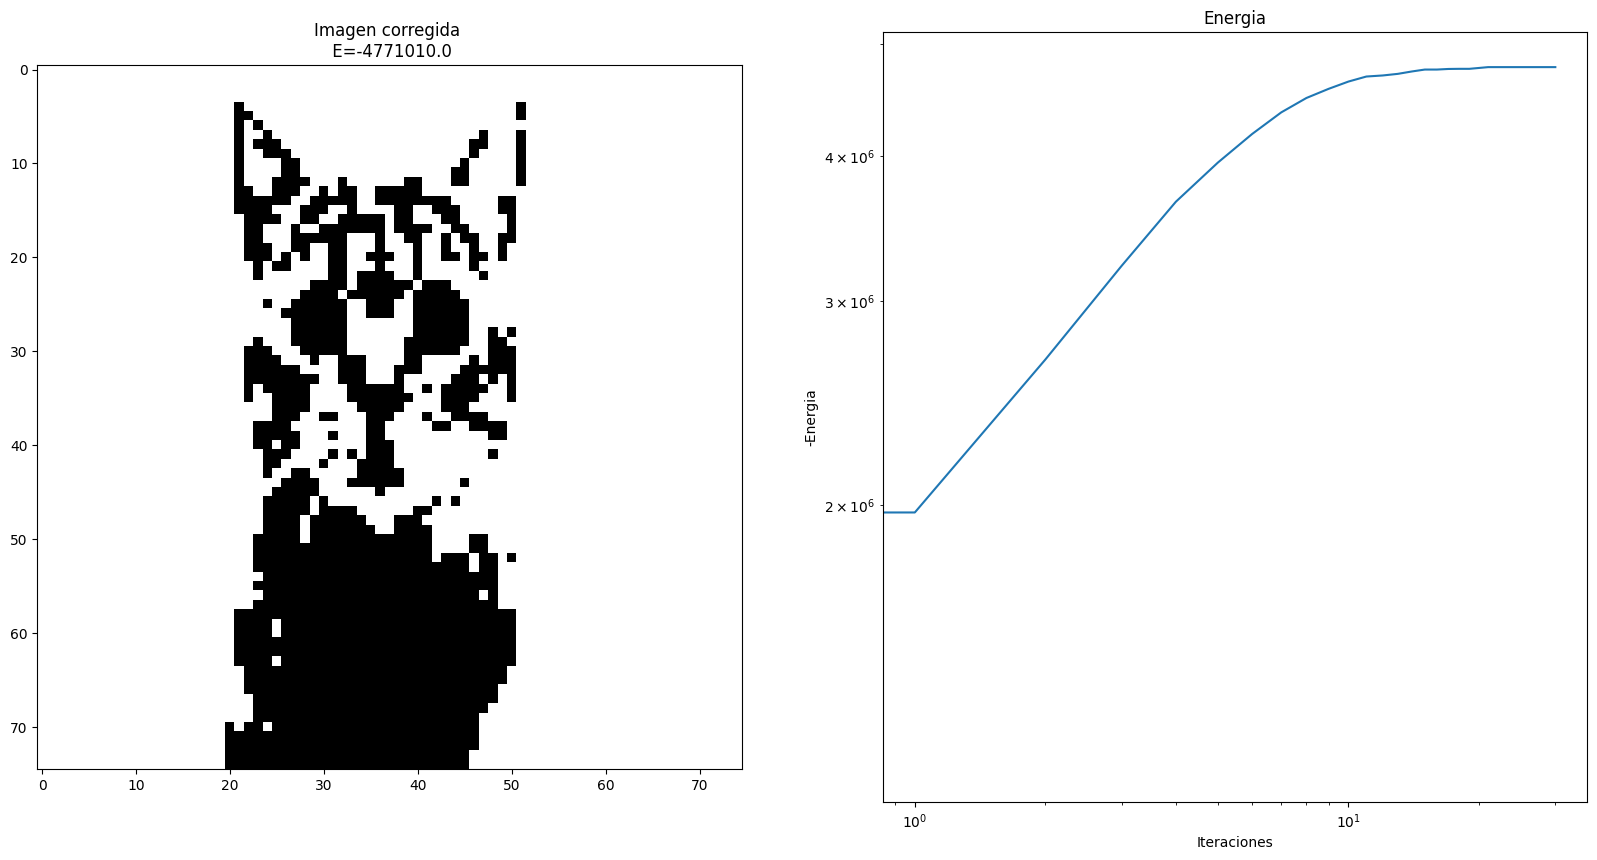

In [48]:
# Vemos la evolución de la red con el patrón 5 igual que antes
state, E =  corregir_patron(pattern6, net, steps=2000, n_iter=30)

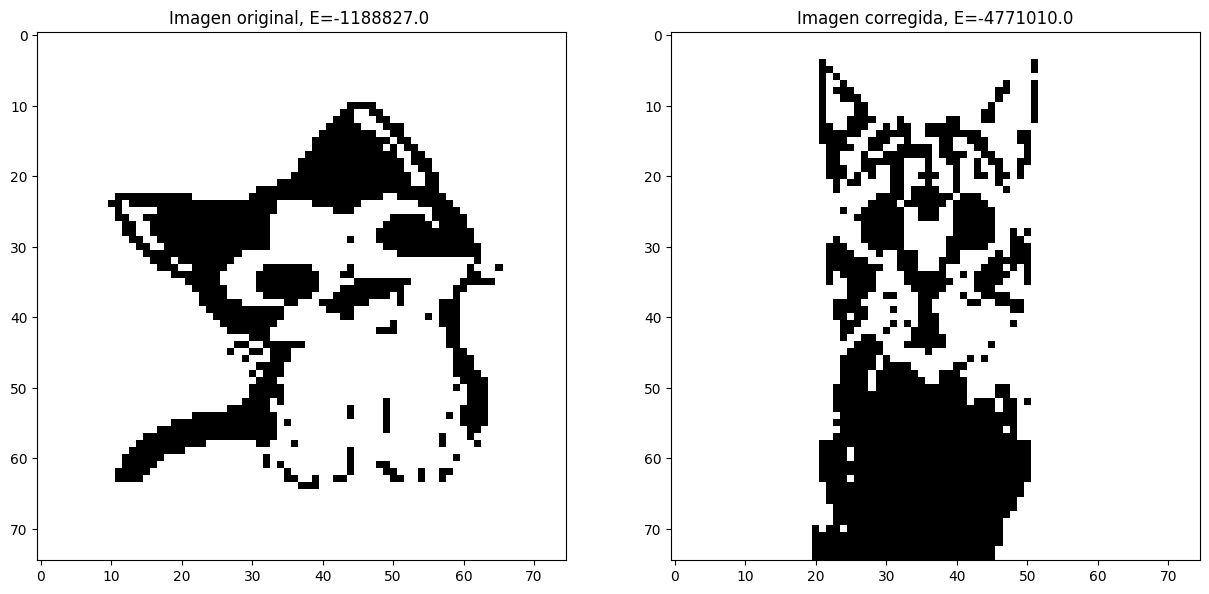

In [49]:
# graficamos la imagen original, la corrección y la energía
plt.figure(figsize=(15, 10))
plt.subplot(1, 2, 1)
plt.imshow(pattern6, cmap='gray')
plt.title(f'Imagen original, E={net.energy(pattern6)} ')
plt.subplot(1, 2, 2)
plt.imshow(state, cmap='gray')
plt.title(f'Imagen corregida, E={np.round(-E[-1], 4)}')
plt.show()
